# Keras를 활용한 one-hot encoding

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [2]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

### Tokenizer 생성 및 고유 정수 mapping : `fit_on_texts`

In [3]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


> padding token 추가를 위한 길이 + 1 작업!

In [5]:
vocab_size = len(t.word_index) + 1
vocab_size

6

> 단어장에 기반하여 `text_to_sequences` 통해 시퀀스로 변환

In [7]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


> 마지막으로 `to_cateogrical`이용하여 one-hot encoding

In [9]:
# catgorical로 변환 . 차원은 vocab_size = 6
one_hot = to_categorical(encoded, num_classes = vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


One-hot vector의 문제점
- Curse of dimensionality
- 벡터 간 거리(유사도) 반영 안됨

## Embedding
- 훈련데이터의 학습으로부터 생성되는 저차원의 dense vector  

[참고자료](https://wikidocs.net/33520)

## Word2Vec
- one-hot encoding된 vector를 input으로 넣고 NN 및 softmax로 결과 embedding vector 생성
- distributional hypothesis
- 크게 `CBoW`와 `Skip-gram` 이라는 두 가지 방법이 있음

### CBoW(Continuous Bag of words)
- 주변 단어들을 통해 중간 단어들을 예측하는 방법
- 예측해야 하는 단어는 target(center) word, 예측에 사용되는 단어들은 context word
- 앞, 뒤로 몇개의 단어를 볼지 그 범위 : window

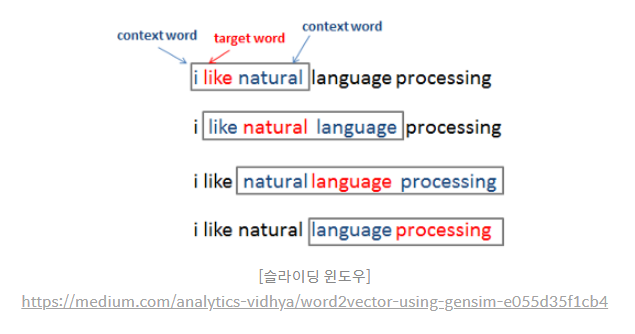
### Skip-Gram
- 중간에 있는 단어로 주변 단어를 예측하는 방법


### Word2Vec 실습
- **`gensim`** : 패키지를 통해 이미 구현된 Word2Vec 모델을 사용할 수 있음
- `NLTK` : 토픽 모델링을 위한 NLP 패키지

In [10]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
### nltk에 내장된 corpus 다운로드
from nltk.corpus import abc
corpus = abc.sents()
print('슝~')

슝~


> corpus의 구성과 길이를 확인합니다.

In [13]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


> `Word2Vec` model 을 `gensim`으로부터 불러오고 훈련을 진행합니다.

[Word2Vec parameter 설명](https://hoonzi-text.tistory.com/2)

`vector size` = 학습 후 임베딩 벡터의 차원  
`window` = 컨텍스트 윈도우 크기  
`min_count` = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)  
`workers` = 학습을 위한 프로세스 수  
`sg` = 0은 CBoW, 1은 Skip-gram.  

In [14]:
from gensim.models import Word2Vec
# 매개변수를 유의해 봅시다!
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, workers=4, sg=0 )

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


> `model.wv.most_similar` 메소드를 통해 cosine 유사도(비슷한 단어들)를 체크합니다.

In [15]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233418107032776), ('skull', 0.911030113697052), ('Bang', 0.905648946762085), ('asteroid', 0.9052114486694336), ('third', 0.9020071625709534), ('baby', 0.8994219303131104), ('dog', 0.898607611656189), ('bought', 0.8975202441215515), ('rally', 0.8912495374679565), ('disc', 0.8889137506484985)]


> 모델 저장: `save_word2vec_format`  
모델 불러오기 : `load_word2vec_format`

### Embedding Vector 시각화
- [Embedding Projector](https://projector.tensorflow.org/)에 tsv 파일 업로드

## FastText
- Word2Vec 모델과 유사하지만, 문자 단위 n-gram 표현을 학습한다는 점에서 다름.
- 최소 단위가 아닌 subword(의미를 가진 단위, ex) 음절)들을 학습
- 오타에 강건하다는 특징을 가짐

## GloVe
> IDEA : 중심 단어 벡터와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 빈도의 로그값이 되도록 만드는 것

- DTM을 차원축소하여 dense representation으로 임베딩하는 방법이 [LSA](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/)
- `LSA`로 **count에 기반한 방법**, `Word2Vec`과 같은 **예측 기반 방법** 은 각각, 전체적인 통계 정보, 단어 벡터 간 유사도 를 측정할 수 있는 장점이 있음

- 두 방법의 장점을 취한 것이 바로 Glove

- `Window based Co-occurence Matrix`를 이해해야 함

In [ ]:
from glove import Corpus, Glove

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
emb = Corpus() 
emb.fit(corpus, window=5)

# 벡터의 차원은 100, 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(emb.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(emb.dictionary)

# Retrospect 
- Word2Vec의 cBoW, SkipGram 모델의 내부 구조에 대하여 논문으로 학습 요망. 
- FastText, Glove에는 어떠한 차이와 장점이 있는지 학습요망.